# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

__ANSWER:__
1. We'll need two equations to describe the flow in the SIS-model:
    $$\frac{dS}{dt} = -\beta SI + \gamma I$$
    
    $$\frac{dI}{dt} = \beta SI - \gamma I$$
2. The first equation tells us that the the growth in the number of Susceptibles is the number of infected people that recovers and become suceptible again ($\gamma I$) minus the number of Susceptibles that become infected $-\beta SI$. For the second equation (the infectious compartment), the flow is reversed.
3. The $\beta$ parameter describes the chance that a healthy person gets infected by the disease. A big $\beta$ means that a disease will spread very quickly, while the reverse is true for a small $\beta$. The parameter $\gamma$ describes how long the an infected individual is infectious.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

1. Using __strategy A__ you would have to vaccinate around just about 75-80% to get around 10 infected individuals. Using __strategy B__ where the most connected nodes gets vaccinated, you would have to vaccinate just about 15% to get the same results! With __strategy C__ it seems that vaccinating 50% of the population does the trick.
2. __strategy C__ takes advantage of the "friendship paradox", which states that most people have fewer friends than their friends have on average. The intuition is that people with more friends, are more likely to be a part of ones own friend group. Or similiarily, that you are less likely to be friends with a person with very few friends. This makes __strategy C__ more effective than __strategy A__. The reason for this is the same as the reason behind __strategy B__ being so much more effective than the other strategies. Removing the most connected nodes, the network loses its ability to transfer processes through few highly connected links, making the spread much less effective. Due to the "friendship paradox", __strategy C__ targets nodes that are more connected than the average node, making it more effective than __strategy A__ where the nodes are chosen randomly.
3. In the BA network, the variation in node degrees are much stronger than in the ER network. Thus, more "hubs" are present in the BA network, making the effect from __strategy B__ and __strategy C__ larger.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

I chose explorable [1] that visualize the phenomenon of herd immunity. In the beginning of an outbreak, no individual is immune, and the disease can spread freely (and rapidly). In the explorable, an unvaccinated infected individual can recover, and become susceptible again. Thus, if too few people are vaccinated, and the disease has a high transmissibility, the disease is never erradicated. However, if enough people are vaccinated, and thus not able to get or transfer the disease, over time the disease will be eradicated, as the disease has fewer susceptible individuals to transfer to. Thus, the population gets "herd immunity", and the unvaccinated individuals are protected by the vaccinated individuals.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [6]:
import numpy as np
import pandas as pd

In [4]:
G = nx.connected_caveman_graph(10, 5)
_ = nw.visualize(G) # Uncomment if you want to have a look at the network

Text(0, 0.5, 'Infected Nodes')

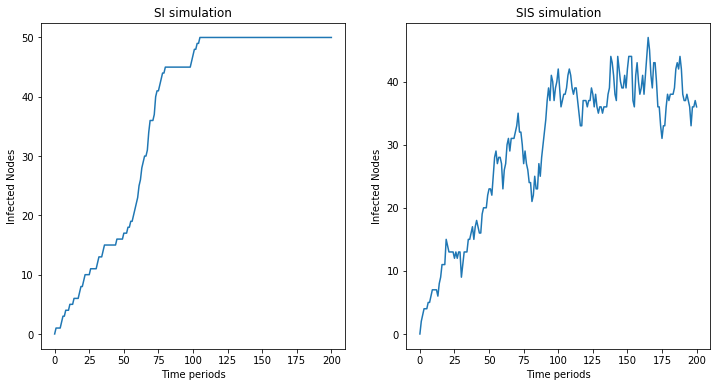

In [22]:
#SI simulation

p_I = 0.1 # The probability of transferring the disease to a neighbor node.
n_iter = 200 # Number of periods in the simulation

I = set() # The infected individuals (initially none)
S = set(G.nodes()) # The set of susceptible individuals. Initially, all nodes are susceptible.
I_n = [len(I)] 
S_n = [len(S)]

patient0 = np.random.choice(list(S)) # Patient Zero! The guy who starts the whole mess.

I.add(patient0) # Patient Zero is added to the list of infected individuals.
S.remove(patient0) # Patient Zero is removed from the Susceptible list.

for t in range(n_iter): # The number of time periods in the simulation
    for infected_node in list(I): # We loop over all the infected individuals who can transfer the disease
        neighbors = G.neighbors(infected_node) # The neighbors of the infected individual
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # Infect all neighbors if the random draw is below the disease probability threshold.
        I |= infected_neighbors # Add newly infected neighbors to infected individuals
        S -= infected_neighbors # Remove infected neighbors from the susceptible list
        
    I_n.append(len(I))
    S_n.append(len(S))
        
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title("SI simulation")      
ax[0].plot(I_n)
ax[0].set_xlabel("Time periods")
ax[0].set_ylabel("Infected Nodes")

#All nodes in the network becomes infected as time passes - this is as expected, as there is no recovery.

#SIS simulation

p_I = 0.1 # The probability of transferring the disease to a neighbor node.
T_I = 10 #number of timesteps before nodes become susceptible again.
n_iter = 200 # Number of periods in the simulation

I = set() # The infected individuals (initially none)
S = set(G.nodes()) # The set of susceptible individuals. Initially, all nodes are susceptible.
I_n = [len(I)] 
S_n = [len(S)]

patient0 = np.random.choice(list(S)) # Patient Zero! The guy who starts the whole mess.

# Dictionary to keep track of days the individuals have been infected.
keys   = list(G.nodes())
values = np.zeros(len(G.nodes()))
days_infected = dict(zip(keys,values))

days_infected[patient0] = 1 #The infected individual have been effected for 1 day.

I.add(patient0) # Patient Zero is added to the list of infected individuals.
S.remove(patient0) # Patient Zero is removed from the Susceptible list.


for t in range(n_iter): # The number of time periods in the simulation
    for infected_node in list(I): # We loop over all the infected individuals who can transfer the disease
        neighbors = G.neighbors(infected_node) # The neighbors of the infected individual
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # Infect all neighbors if the random draw is below the disease probability threshold.
        I |= infected_neighbors # Add newly infected neighbors to infected individuals
        S -= infected_neighbors # Remove infected neighbors from the susceptible list
        #Check to see if an individual should go from infected to susceptible:
        if days_infected[infected_node] < T_I:
            days_infected[infected_node] = days_infected[infected_node] + 1
        else:
            days_infected[infected_node] = 0
            I.remove(infected_node)
            S.add(infected_node)
        
        
    I_n.append(len(I))
    S_n.append(len(S))
        
ax[1].set_title("SIS simulation")        
ax[1].plot(I_n)
ax[1].set_xlabel("Time periods")
ax[1].set_ylabel("Infected Nodes")

#We see that the trend is upward going in the beginning, and stabilize around 35-40, as people continuosly go back and forth from infected and susceptible 

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [76]:
#Loading data:
data = pd.read_csv(
    "facebook-wall.txt.gz",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

def get_slice(data, t0, t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

In [77]:
def SIRS_simulation(G, p_I = 0.4, n_iter=200, T_I=10):

    I = set() # The infected individuals (initially none)
    S = set(G.nodes()) # The set of susceptible individuals. Initially, all nodes are susceptible.
    R = set() #Recovered individuals
    
    I_n = [len(I)] 
    S_n = [len(S)]
    R_n = [len(R)]

    patient0 = np.random.choice(list(S)) # Patient Zero! The guy who starts the whole mess.

    # Dictionary to keep track of days the individuals have been infected.
    keys   = list(G.nodes())
    values = np.zeros(len(G.nodes()))
    days_infected = dict(zip(keys,values))

    days_infected[patient0] = 1 #The infected individual have been effected for 1 day.

    I.add(patient0) # Patient Zero is added to the list of infected individuals.
    S.remove(patient0) # Patient Zero is removed from the Susceptible list.


    for t in range(n_iter): # The number of time periods in the simulation
        for infected_node in list(I): # We loop over all the infected individuals who can transfer the disease
            neighbors = G.neighbors(infected_node) # The neighbors of the infected individual
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # Infect all neighbors if the random draw is below the disease probability threshold.
            I |= infected_neighbors # Add newly infected neighbors to infected individuals
            S -= infected_neighbors # Remove infected neighbors from the susceptible list
            #Check to see if an individual should go from infected to susceptible:
            if days_infected[infected_node] < T_I:
                days_infected[infected_node] = days_infected[infected_node] + 1
            else:
                days_infected[infected_node] = 0
                I.remove(infected_node)
                R.add(infected_node)


        I_n.append(len(I))
        S_n.append(len(S))
        R_n.append(len(R))
        
    

    df = pd.DataFrame({'time':list(range(n_iter+1)),
                      'susceptible':S_n,
                       'infected':I_n,
                       'recovered':R_n
                      })
    return df
    

Text(0.5, 1.0, 'SIRS Simulation')

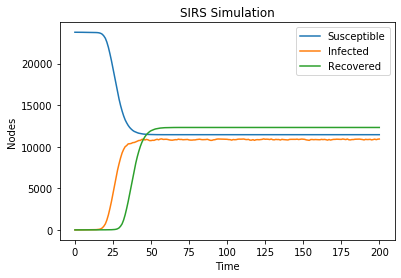

In [78]:
#I'll use 30 days worth of data
t0 = data.timestamp.max() - 86400 * 30
t1 = data.timestamp.max() 
G = get_slice(data, t0, t1)

df_SIRS = SIRS_simulation(G)
fig, ax = plt.subplots()
ax.plot(df_SIRS.susceptible)
ax.plot(df_SIRS.infected)
ax.plot(df_SIRS.recovered)
ax.legend(["Susceptible", "Infected", "Recovered"])
ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
ax.set_title("SIRS Simulation")

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.